<a href="https://colab.research.google.com/github/RAMJI123-ai/my-projects/blob/main/stock_price_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.0150 - val_loss: 0.0011
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 8.7286e-04 - val_loss: 0.0018
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 8.7647e-04 - val_loss: 8.4204e-04
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 6.5758e-04 - val_loss: 9.3834e-04
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 6.5239e-04 - val_loss: 8.8962e-04
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 6.2059e-04 - val_loss: 7.2507e-04
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 5.0986e-04 - val_loss: 0.0012
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 5.7221e-04 - val_loss: 8.3713e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 4.4675e-04 - val_loss: 6.5834e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 4.5525e-04 - val_loss: 0.0011
Epoch 12/20
6

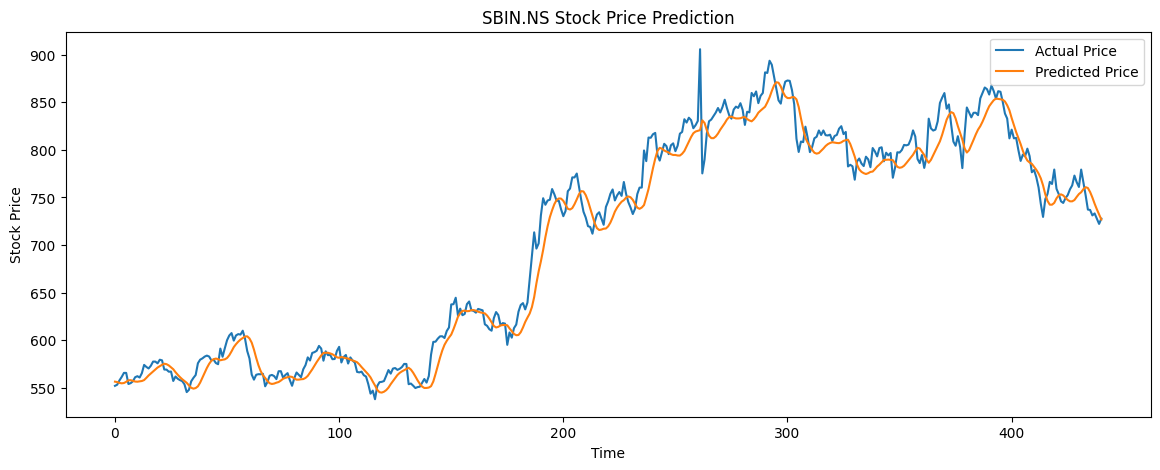

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf

# Step 1: Data Collection
def get_stock_data(ticker, start, end):
    df = yf.download(ticker, start=start, end=end)
    return df

# Step 2: Load Data
stock_ticker = 'SBIN.NS'  # GAIL India stock
start_date = '2015-01-01'
end_date = '2025-02-18'
data = get_stock_data(stock_ticker, start_date, end_date)

# Step 3: Data Preprocessing
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data[['Close']])

train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

seq_length = 60  # Lookback period of 60 days
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Step 4: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Predict Future Price for 11-02-2025
last_60_days = data_scaled[-seq_length:]
last_60_days = np.array(last_60_days).reshape(1, seq_length, 1)
predicted_price = model.predict(last_60_days)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Closing Price for GAIL on 19-02-2025: {predicted_price[0][0]:.2f}")

# Step 7: Plot Results
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(14,5))
plt.plot(y_test_actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title(f'{stock_ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()
